## Visualize total cost by life years saved for each iteration

The experiment must be run, including `summarize.py` prior to running this notebook.

The visualization gives insight into the distribution and covariance of these key outcomes across simulation iterations. 

The outcomes are defined as `implementation - baseline` for a given FQHC. We only use two FQHCs to make the plot easier to read. 

We may convert this into a component of `summarize.py` in future experiments to avoid having a notebook as part of the experiment workflow.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("crcsim/experiment/summary/combined.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'crcsim/experiment/summary/combined.csv'

In [3]:
baseline_scenarios = [
    "fqhc1_baseline",
    "fqhc4_baseline",
]
implementation_scenarios = [
    "fqhc1_implementation",
    "fqhc4_implementation",
]

In [4]:
cost_cols = [
    "discounted_cost_routine_per_1k_40yo",
    "discounted_cost_diagnostic_per_1k_40yo",
    "discounted_cost_surveillance_per_1k_40yo",
    "discounted_cost_treatment_initial_per_1k_40yo",
    "discounted_cost_treatment_ongoing_per_1k_40yo",
    "discounted_cost_treatment_terminal_per_1k_40yo",
]

In [5]:
df["total_cost"] = df[cost_cols].sum(axis=1)

In [6]:
baseline = df[df["scenario"].isin(baseline_scenarios)].sort_values(
    ["scenario", "iteration"]
)

In [7]:
implementation = df[df["scenario"].isin(implementation_scenarios)].sort_values(
    ["scenario", "iteration"]
)

In [8]:
y = implementation["total_cost"].to_numpy() - baseline["total_cost"].to_numpy()
x = (
    implementation["discounted_lifeobs_if_unscreened_undiagnosed_at_40"].to_numpy()
    - baseline["discounted_lifeobs_if_unscreened_undiagnosed_at_40"].to_numpy()
) * 1_000  # convert to per 1k

In [9]:
fqhc = np.where(baseline["scenario"].str.startswith("fqhc1"), "FQHC 1", "FQHC 4")

In [10]:
data = pd.DataFrame({"FQHC": fqhc, "Incremental Cost": y, "Life Years Saved": x})

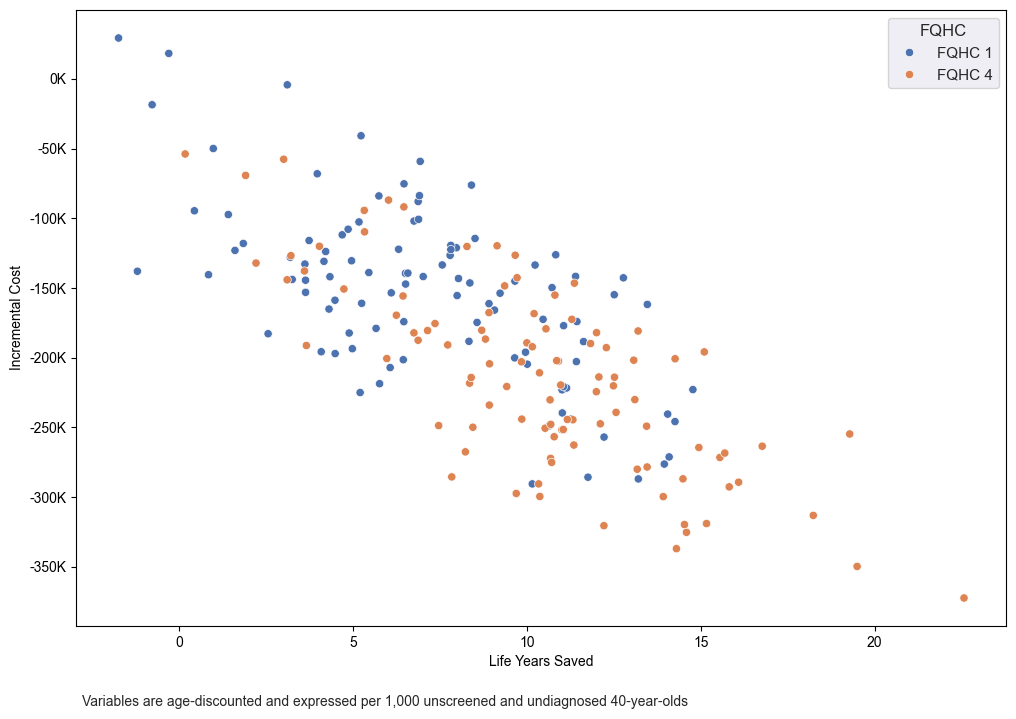

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_theme()
sns.scatterplot(data=data, x="Life Years Saved", y="Incremental Cost", hue="FQHC")
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x / 1000) + "K")
)
plt.figtext(
    0.13,
    0.01,
    "Variables are age-discounted and expressed per 1,000 unscreened and undiagnosed 40-year-olds",
    horizontalalignment="left",
    fontsize=10,
)
plt.savefig("crcsim/experiment/summary/cost_vs_lys.png", dpi=300, bbox_inches="tight")